In [1]:
library(readr) # Loads the readr package so we can use `read_tsv`
library(dplyr) # Loads the dplyr package so we can use `left_join`
library(taxa)
library(metacoder)
library(vegan)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


This is metacoder verison 0.3.4 (stable)

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7



In [2]:
otu_data <- read_tsv("../data/metacoder/asv_table.tsv") # You might need to change the path to the file
#head(otu_data) # You can also enter just `otu_data` to print it
tax_data <- read_tsv("../data/metacoder/tax_assignments.tsv")
#head(tax_data) # You can also enter `tax_data` to print it


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  OTU_ID = col_character(),
  `P8-rep4` = col_double(),
  `P5-rep4` = col_double(),
  `P9-rep1` = col_double(),
  `P9-rep5` = col_double(),
  `P9-rep4` = col_double(),
  `P5-rep1` = col_double(),
  `P8-rep2` = col_double(),
  `P8-rep1` = col_double(),
  `P9-rep2` = col_double(),
  `P9-rep3` = col_double(),
  `P8-rep3` = col_double(),
  `P5-rep5` = col_double(),
  `P5-rep2` = col_double(),
  `P5-rep3` = col_double(),
  `P8-rep5` = col_double()
)



── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  OTU_ID = col_character(),
  Taxon = col_character(),
  Kingdom = col_character(),
  Phylum = col_character(),
  Class = col_character(),
  Order = col_character(),
  Family = col_character(),
  Genus = col_character(),
  Species = col_character(),
  Confidence = col_double()
)




In [3]:
otu_data <- left_join(otu_data, tax_data,
                      by = c("OTU_ID" = "OTU_ID")) # identifies cols with shared IDs
head(otu_data)

OTU_ID,P8-rep4,P5-rep4,P9-rep1,P9-rep5,P9-rep4,P5-rep1,P8-rep2,P8-rep1,P9-rep2,⋯,P8-rep5,Taxon,Kingdom,Phylum,Class,Order,Family,Genus,Species,Confidence
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
e5400356daabbc5a41f935af70513043,1598,630,297,795,1449,359,2160,265,220,⋯,1850,k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales; f__Bradyrhizobiaceae; g__Bradyrhizobium,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Bradyrhizobiaceae,Bradyrhizobium,NA,0.7767485
7cbebea20e305a557ffc3dc23bae61ae,1111,36,127,335,610,24,1502,202,54,⋯,1216,k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__; g__; s__,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,NA,NA,NA,0.9942099
4dc5023fdc00f325e169fced16dca21c,1022,93,323,863,2013,50,1855,212,254,⋯,1028,k__Bacteria; p__Verrucomicrobia; c__[Spartobacteria]; o__[Chthoniobacterales]; f__[Chthoniobacteraceae]; g__DA101; s__,Bacteria,Verrucomicrobia,[Spartobacteria],[Chthoniobacterales],[Chthoniobacteraceae],DA101,NA,0.9999999
4c076cffb4dc7aaae47cb237d7067066,739,942,104,347,814,590,611,113,183,⋯,742,k__Bacteria; p__Firmicutes; c__Bacilli; o__Bacillales; f__Bacillaceae; g__Bacillus; s__longiquaesitum,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus,longiquaesitum,0.9991667
3c4c98cf9b1264b89f9ecd0812a0f7d8,632,195,224,571,1259,113,615,88,157,⋯,611,k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales; f__Hyphomicrobiaceae; g__Rhodoplanes; s__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Hyphomicrobiaceae,Rhodoplanes,NA,0.9999237
ba22b4e380c113550221ee14a5dc5119,575,29,45,132,151,11,940,94,28,⋯,627,k__Bacteria; p__Acidobacteria; c__DA052; o__Ellin6513; f__; g__; s__,Bacteria,Acidobacteria,DA052,Ellin6513,NA,NA,NA,1.0000000


In [4]:
sample_data <- read_tsv("../data/metacoder/sample_metadata.tsv",
                        col_types = "cc")

In [5]:
obj <- parse_tax_data(otu_data,
                      class_cols = "Taxon",
                      class_sep = ";",
                      class_regex = "^([a-z]{0,1})_{0,2}(.*)$",
                      class_key = c("tax_rank" = "taxon_rank", "name" = "taxon_name"))

Warning message:
“`as.tbl()` was deprecated in dplyr 1.0.0.
Please use `tibble::as_tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [6]:
obj

<Taxmap>
  1634 taxa: aab. Bacteria, aac. Proteobacteria ... ckw. mixta
  1634 edges: NA->aab, aab->aac, aab->aad ... brp->ckv, brq->ckw
  2 data sets:
    tax_data:
      # A tibble: 8,820 x 26
        taxon_id OTU_ID        `P8-rep4` `P5-rep4` `P9-rep1` `P9-rep5`
        <chr>    <chr>             <dbl>     <dbl>     <dbl>     <dbl>
      1 azw      e5400356daab…      1598       630       297       795
      2 brr      7cbebea20e30…      1111        36       127       335
      3 brs      4dc5023fdc00…      1022        93       323       863
      # … with 8,817 more rows, and 20 more variables: P9-rep4 <dbl>,
      #   P5-rep1 <dbl>, P8-rep2 <dbl>, P8-rep1 <dbl>, P9-rep2 <dbl>,
      #   P9-rep3 <dbl>, P8-rep3 <dbl>, P5-rep5 <dbl>, P5-rep2 <dbl>,
      #   P5-rep3 <dbl>, …
    class_data:
      # A tibble: 61,005 x 5
        taxon_id input_index tax_rank name           regex_match      
        <chr>          <int> <chr>    <chr>          <chr>            
      1 aab               

In [7]:
obj$data$tax_data <- zero_low_counts(obj, dataset = "tax_data", min_count = 2)

Warning message:
“Use of "dataset" is depreciated. Use "data" instead.”
No `cols` specified, so using all numeric columns:
   P8-rep4, P5-rep4, P9-rep1 ... P5-rep3, P8-rep5, Confidence


Zeroing 10897 of 141120 counts less than 2.



In [8]:
no_reads <- rowSums(obj$data$tax_data[, sample_data$SampleID]) == 0
sum(no_reads)

[1] 0

In [9]:
obj <- filter_obs(obj, data = "tax_data", ! no_reads, drop_taxa = TRUE)
print(obj)

<Taxmap>
  1634 taxa: aab. Bacteria, aac. Proteobacteria ... ckw. mixta
  1634 edges: NA->aab, aab->aac, aab->aad ... brp->ckv, brq->ckw
  2 data sets:
    tax_data:
      # A tibble: 8,820 x 17
        taxon_id `P8-rep4` `P5-rep4` `P9-rep1` `P9-rep5` `P9-rep4`
        <chr>        <dbl>     <dbl>     <dbl>     <dbl>     <dbl>
      1 azw           1598       630       297       795      1449
      2 brr           1111        36       127       335       610
      3 brs           1022        93       323       863      2013
      # … with 8,817 more rows, and 11 more variables: P5-rep1 <dbl>,
      #   P8-rep2 <dbl>, P8-rep1 <dbl>, P9-rep2 <dbl>, P9-rep3 <dbl>,
      #   P8-rep3 <dbl>, P5-rep5 <dbl>, P5-rep2 <dbl>, P5-rep3 <dbl>,
      #   P8-rep5 <dbl>, …
    class_data:
      # A tibble: 61,005 x 5
        taxon_id input_index tax_rank name           regex_match      
        <chr>          <int> <chr>    <chr>          <chr>            
      1 aab                1 k        Bacteria

In [10]:
obj$data$tax_data <- calc_obs_props(obj, "tax_data")

No `cols` specified, so using all numeric columns:
   P8-rep4, P5-rep4, P9-rep1 ... P5-rep3, P8-rep5, Confidence


Calculating proportions from counts for 16 columns for 8820 observations.



In [11]:
obj

<Taxmap>
  1634 taxa: aab. Bacteria, aac. Proteobacteria ... ckw. mixta
  1634 edges: NA->aab, aab->aac, aab->aad ... brp->ckv, brq->ckw
  2 data sets:
    tax_data:
      # A tibble: 8,820 x 17
        taxon_id `P8-rep4` `P5-rep4` `P9-rep1` `P9-rep5` `P9-rep4`
        <chr>        <dbl>     <dbl>     <dbl>     <dbl>     <dbl>
      1 azw         0.0402  0.0145     0.0113    0.0130    0.0143 
      2 brr         0.0280  0.000828   0.00484   0.00549   0.00603
      3 brs         0.0257  0.00214    0.0123    0.0141    0.0199 
      # … with 8,817 more rows, and 11 more variables: P5-rep1 <dbl>,
      #   P8-rep2 <dbl>, P8-rep1 <dbl>, P9-rep2 <dbl>, P9-rep3 <dbl>,
      #   P8-rep3 <dbl>, P5-rep5 <dbl>, P5-rep2 <dbl>, P5-rep3 <dbl>,
      #   P8-rep5 <dbl>, …
    class_data:
      # A tibble: 61,005 x 5
        taxon_id input_index tax_rank name           regex_match      
        <chr>          <int> <chr>    <chr>          <chr>            
      1 aab                1 k        Bacteria

In [12]:
obj$data$tax_abund <- calc_taxon_abund(obj, "tax_data",
                                       cols = sample_data$SampleID)

Summing per-taxon counts from 15 columns for 1634 taxa



In [13]:
obj

<Taxmap>
  1634 taxa: aab. Bacteria, aac. Proteobacteria ... ckw. mixta
  1634 edges: NA->aab, aab->aac, aab->aad ... brp->ckv, brq->ckw
  3 data sets:
    tax_data:
      # A tibble: 8,820 x 17
        taxon_id `P8-rep4` `P5-rep4` `P9-rep1` `P9-rep5` `P9-rep4`
        <chr>        <dbl>     <dbl>     <dbl>     <dbl>     <dbl>
      1 azw         0.0402  0.0145     0.0113    0.0130    0.0143 
      2 brr         0.0280  0.000828   0.00484   0.00549   0.00603
      3 brs         0.0257  0.00214    0.0123    0.0141    0.0199 
      # … with 8,817 more rows, and 11 more variables: P5-rep1 <dbl>,
      #   P8-rep2 <dbl>, P8-rep1 <dbl>, P9-rep2 <dbl>, P9-rep3 <dbl>,
      #   P8-rep3 <dbl>, P5-rep5 <dbl>, P5-rep2 <dbl>, P5-rep3 <dbl>,
      #   P8-rep5 <dbl>, …
    class_data:
      # A tibble: 61,005 x 5
        taxon_id input_index tax_rank name           regex_match      
        <chr>          <int> <chr>    <chr>          <chr>            
      1 aab                1 k        Bacteria

In [14]:
obj$data$tax_occ <- calc_n_samples(obj, "tax_abund", groups = sample_data$Sites, cols = sample_data$SampleID)

Calculating number of samples with a value greater than 0 for 15 columns in 3 groups for 1634 observations



In [15]:
obj

<Taxmap>
  1634 taxa: aab. Bacteria, aac. Proteobacteria ... ckw. mixta
  1634 edges: NA->aab, aab->aac, aab->aad ... brp->ckv, brq->ckw
  4 data sets:
    tax_data:
      # A tibble: 8,820 x 17
        taxon_id `P8-rep4` `P5-rep4` `P9-rep1` `P9-rep5` `P9-rep4`
        <chr>        <dbl>     <dbl>     <dbl>     <dbl>     <dbl>
      1 azw         0.0402  0.0145     0.0113    0.0130    0.0143 
      2 brr         0.0280  0.000828   0.00484   0.00549   0.00603
      3 brs         0.0257  0.00214    0.0123    0.0141    0.0199 
      # … with 8,817 more rows, and 11 more variables: P5-rep1 <dbl>,
      #   P8-rep2 <dbl>, P8-rep1 <dbl>, P9-rep2 <dbl>, P9-rep3 <dbl>,
      #   P8-rep3 <dbl>, P5-rep5 <dbl>, P5-rep2 <dbl>, P5-rep3 <dbl>,
      #   P8-rep5 <dbl>, …
    class_data:
      # A tibble: 61,005 x 5
        taxon_id input_index tax_rank name           regex_match      
        <chr>          <int> <chr>    <chr>          <chr>            
      1 aab                1 k        Bacteria

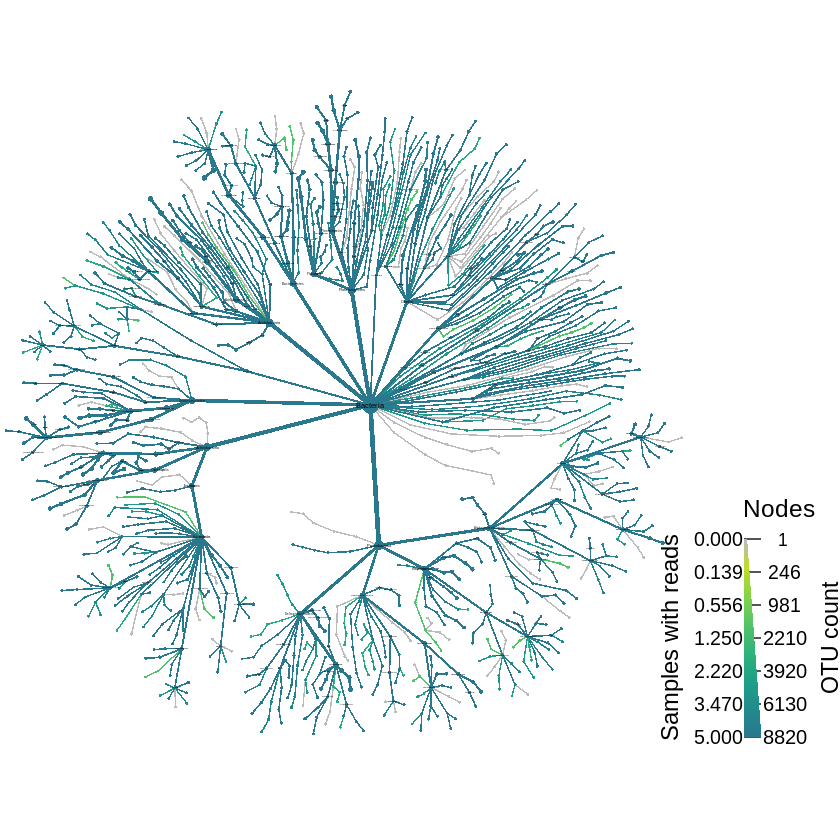

In [16]:
set.seed(1)
heat_tree(obj, 
          node_label = obj$taxon_names(),
          node_size = obj$n_obs(),
          node_color = obj$data$tax_occ$P5, 
          node_size_axis_label = "OTU count",
          node_color_axis_label = "Samples with reads",
          layout = "davidson-harel", # The primary layout algorithm
          initial_layout = "reingold-tilford",
          output_file = "../figures/metacoder-p5.pdf") # The layout algorithm that initializes node locations

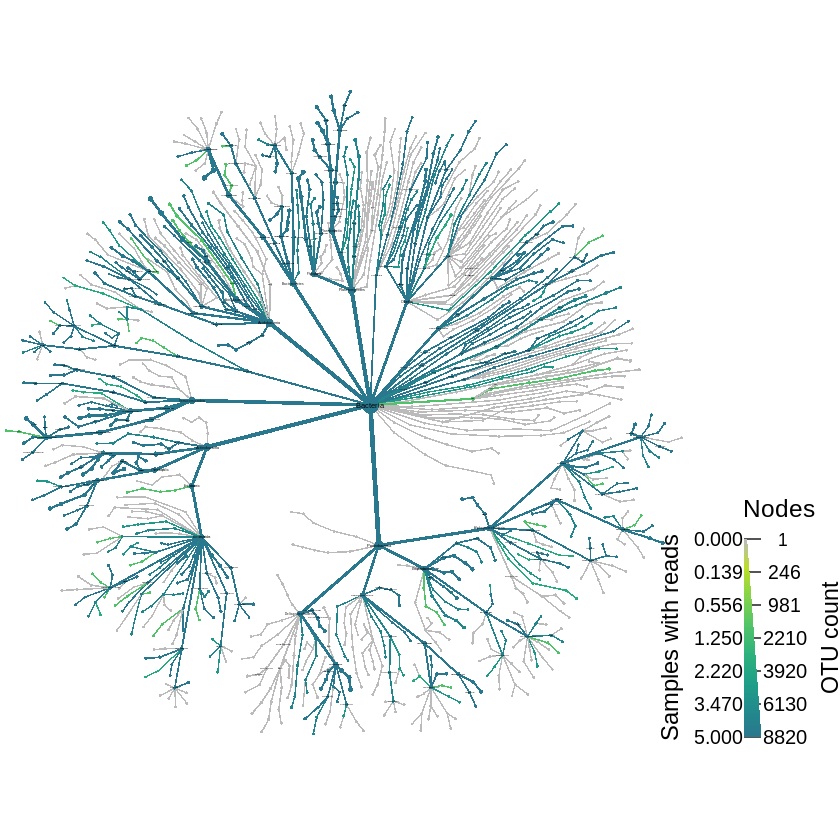

In [17]:
set.seed(1)
heat_tree(obj, 
          node_label = obj$taxon_names(),
          node_size = obj$n_obs(),
          node_color = obj$data$tax_occ$P8, 
          node_size_axis_label = "OTU count",
          node_color_axis_label = "Samples with reads",
          layout = "davidson-harel", # The primary layout algorithm
          initial_layout = "reingold-tilford",
          output_file = "../figures/metacoder-p8.pdf") # The layout algorithm that initializes node locations

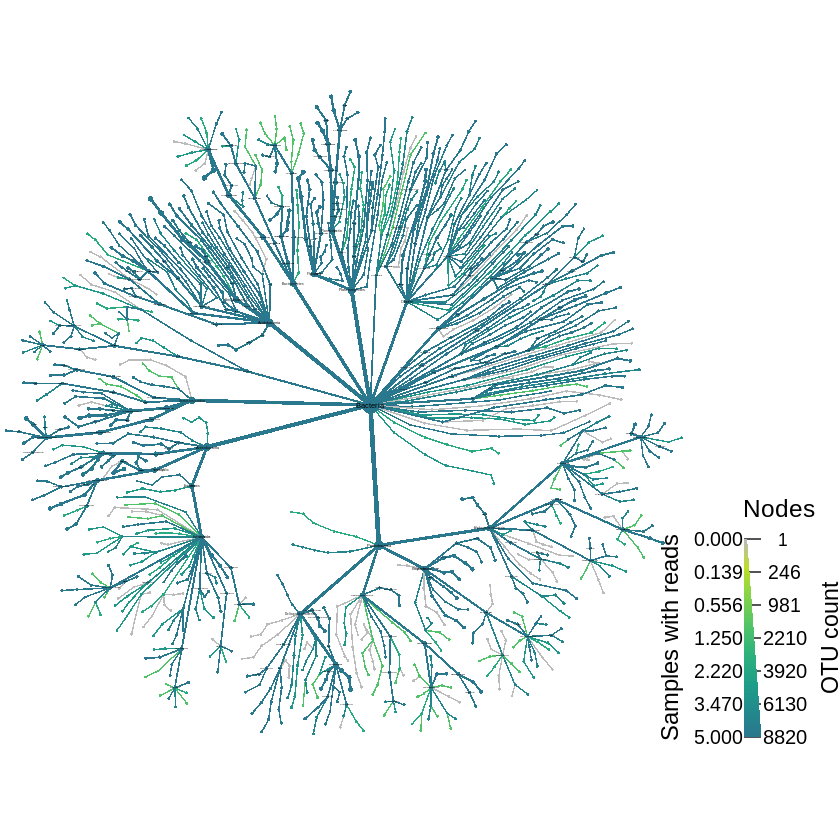

In [18]:
set.seed(1)
heat_tree(obj, 
          node_label = obj$taxon_names(),
          node_size = obj$n_obs(),
          node_color = obj$data$tax_occ$P9, 
          node_size_axis_label = "OTU count",
          node_color_axis_label = "Samples with reads",
          layout = "davidson-harel", # The primary layout algorithm
          initial_layout = "reingold-tilford",
          output_file = "../figures/metacoder-p9.pdf") # The layout algorithm that initializes node locations

In [19]:
sample_data$inv_simp <- diversity(obj$data$tax_data[, sample_data$SampleID],
                                  index = "invsimpson",
                                  MARGIN = 2) # What orietation the matrix is in

In [20]:
sample_data

SampleID,Sites,inv_simp
<chr>,<chr>,<dbl>
P8-rep4,P8,168.6727
P5-rep4,P5,517.2598
P9-rep1,P9,577.3575
P9-rep5,P9,561.3509
P9-rep4,P9,484.0833
P5-rep1,P5,477.4712
P8-rep2,P8,195.6566
P8-rep1,P8,167.5042
P9-rep2,P9,427.5017


In [21]:
library(ggplot2)


Attaching package: ‘ggplot2’


The following object is masked from ‘package:taxa’:

    map_data




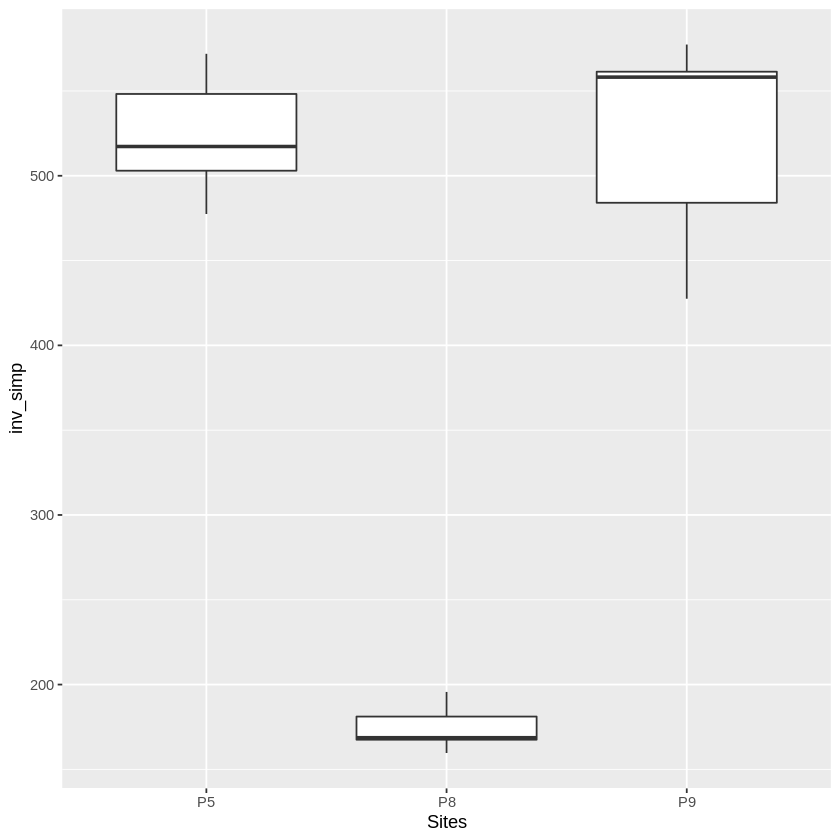

In [22]:
ggplot(sample_data, aes(x = Sites, y = inv_simp)) +
  geom_boxplot()

In [23]:
anova_result <- aov(inv_simp ~ Sites, sample_data)
summary(anova_result)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Sites        2 403925  201963   107.2 2.22e-08 ***
Residuals   12  22613    1884                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [24]:
obj$data$diff_table <- compare_groups(obj,
                                      data = "tax_abund",
                                      cols = sample_data$SampleID, # What columns of sample data to use
                                      groups = sample_data$Sites) # What category each sample is assigned to
obj$data$diff_table

Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning me

taxon_id,treatment_1,treatment_2,log2_median_ratio,median_diff,mean_diff,wilcox_p_value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
aab,P8,P5,0.00000000,0.000000e+00,0.000000e+00,NaN
aac,P8,P5,0.01878430,3.227177e-03,1.719383e-03,0.690476190
aad,P8,P5,0.36231271,5.210863e-02,4.995751e-02,0.007936508
aae,P8,P5,0.83590051,6.136110e-02,7.058987e-02,0.007936508
aaf,P8,P5,-0.65432626,-2.194557e-02,-2.654423e-02,0.007936508
aag,P8,P5,0.33340185,3.631684e-02,3.224128e-02,0.031746032
aah,P8,P5,-1.22065601,-5.319694e-02,-6.438714e-02,0.007936508
aai,P8,P5,0.06239435,3.121181e-03,1.537935e-03,0.690476190
aaj,P8,P5,-0.25759127,-1.398991e-04,1.048128e-04,1.000000000


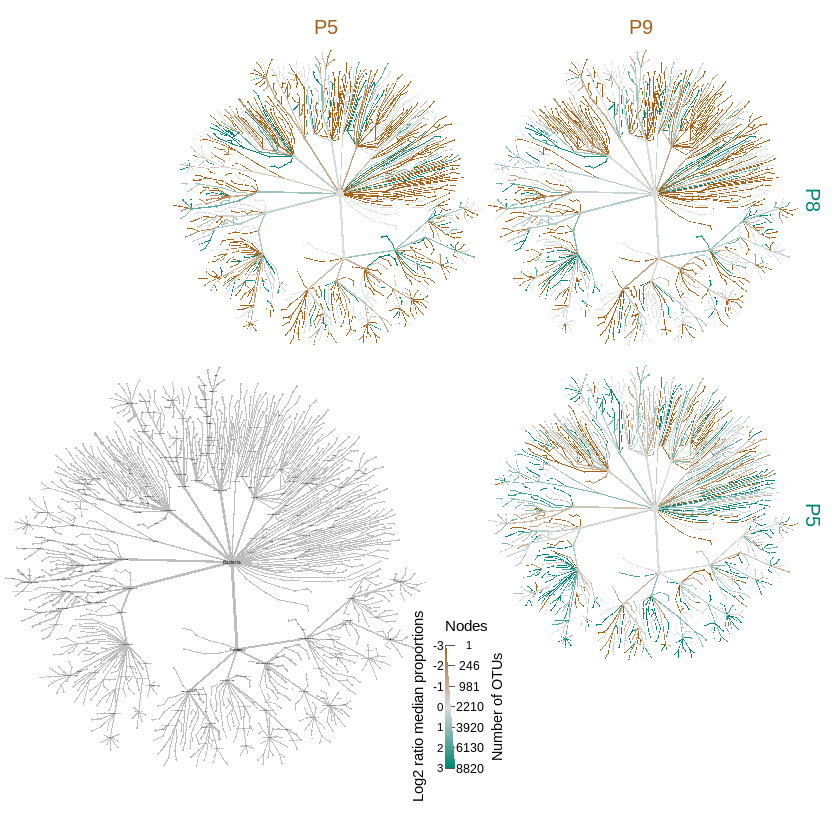

In [25]:
set.seed(1)
heat_tree_matrix(obj,
                 data = "diff_table",
                 node_size = n_obs, # n_obs is a function that calculates, in this case, the number of OTUs per taxon
                 node_label = taxon_names,
                 node_color = log2_median_ratio, # A column from `obj$data$diff_table`
                 node_color_range = diverging_palette(), # The built-in palette for diverging data
                 node_color_trans = "linear", # The default is scaled by circle area
                 node_color_interval = c(-3, 3), # The range of `log2_median_ratio` to display
                 edge_color_interval = c(-3, 3), # The range of `log2_median_ratio` to display
                 node_size_axis_label = "Number of OTUs",
                 node_color_axis_label = "Log2 ratio median proportions",
                 layout = "davidson-harel", # The primary layout algorithm
                 initial_layout = "reingold-tilford", # The layout algorithm that initializes node locations
                 output_file = "../figures/differential_heat_tree.pdf") # Saves the plot as a pdf file